In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
import math
import json

PRECISION = 6

pd.options.display.float_format = '{:,.6f}'.format

1. Wczytanie danych wyjściowych z symulacji -> `looper/simulation/results`

In [6]:
folder_path = '../results_final_100iter_30runs'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dataframes = {os.path.splitext(f)[0]: pd.read_csv(os.path.join(folder_path, f)) for f in csv_files}

- Dodanie kolumny z wartościa szukanego optimum i wymiarem funkcji

In [7]:
with open('../functions.json', 'r') as f:
    functions_minimums = json.load(f)

for name, df in dataframes.items():
    function_name = name.split('_')[0]
    optimum_value = functions_minimums[function_name]['minimum_value']
    dimensions = functions_minimums[function_name]['dimensions']
    df['optimum'] = optimum_value
    df['dimensions'] = dimensions

2. Dla każdej kombinacji funkcji i mutacji wyliczenie **MBF**, **BBF**, **WBF**, **STD** i **VAR**

In [8]:
results = {}

for name, df in dataframes.items():
    mbf = df['fitness'].mean()
    bbf = df['fitness'].min()
    wbf = df['fitness'].max()
    var = ((df['fitness'] - df['optimum']) ** 2).mean()
    std_dev = df['fitness'].std()
    results[name] = {'optimum': df['optimum'].iloc[0], 'wymiary':df['dimensions'].iloc[0], 'MBF': mbf, 'BBF': bbf, 'WBF': wbf, 'STD': std_dev, 'VAR': var}

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = results_df.index.str.split('_', expand=True)
results_df.index.names = ['funkcja', 'mutacja']

results_df.sort_values(by=['funkcja', 'mutacja'], inplace=True)
results_df = results_df.reset_index()

results_df

,funkcja,mutacja,optimum,wymiary,MBF,BBF,WBF,STD,VAR
0,ackley,best1bin,0,8,0.197741,0.047407,0.642787,0.118907,0.052769
1,ackley,best2bin,0,8,14.133433,8.292951,19.922670,3.173407,209.488771
2,ackley,current1bin,0,8,16.070532,12.636635,18.750881,1.644452,260.876068
3,ackley,current2bin,0,8,18.645713,13.383604,19.926497,1.405200,349.571381
4,ackley,rand1bin,0,8,9.761290,5.450315,15.719416,2.992901,103.941651
5,ackley,rand2bin,0,8,18.526314,16.780058,19.928175,0.987652,344.167262
6,beale,best1bin,0,2,0.025402,0.000000,0.762070,0.139134,0.019358
7,beale,best2bin,0,2,0.000000,0.000000,0.000000,0.000000,0.000000
8,beale,current1bin,0,2,0.000010,0.000000,0.000048,0.000013,0.000000
9,beale,current2bin,0,2,0.000291,0.000001,0.001712,0.000347,0.000000


3. Narysuj wykresy MDF, BBF, WBF w zależności od funkcji i mutacji.

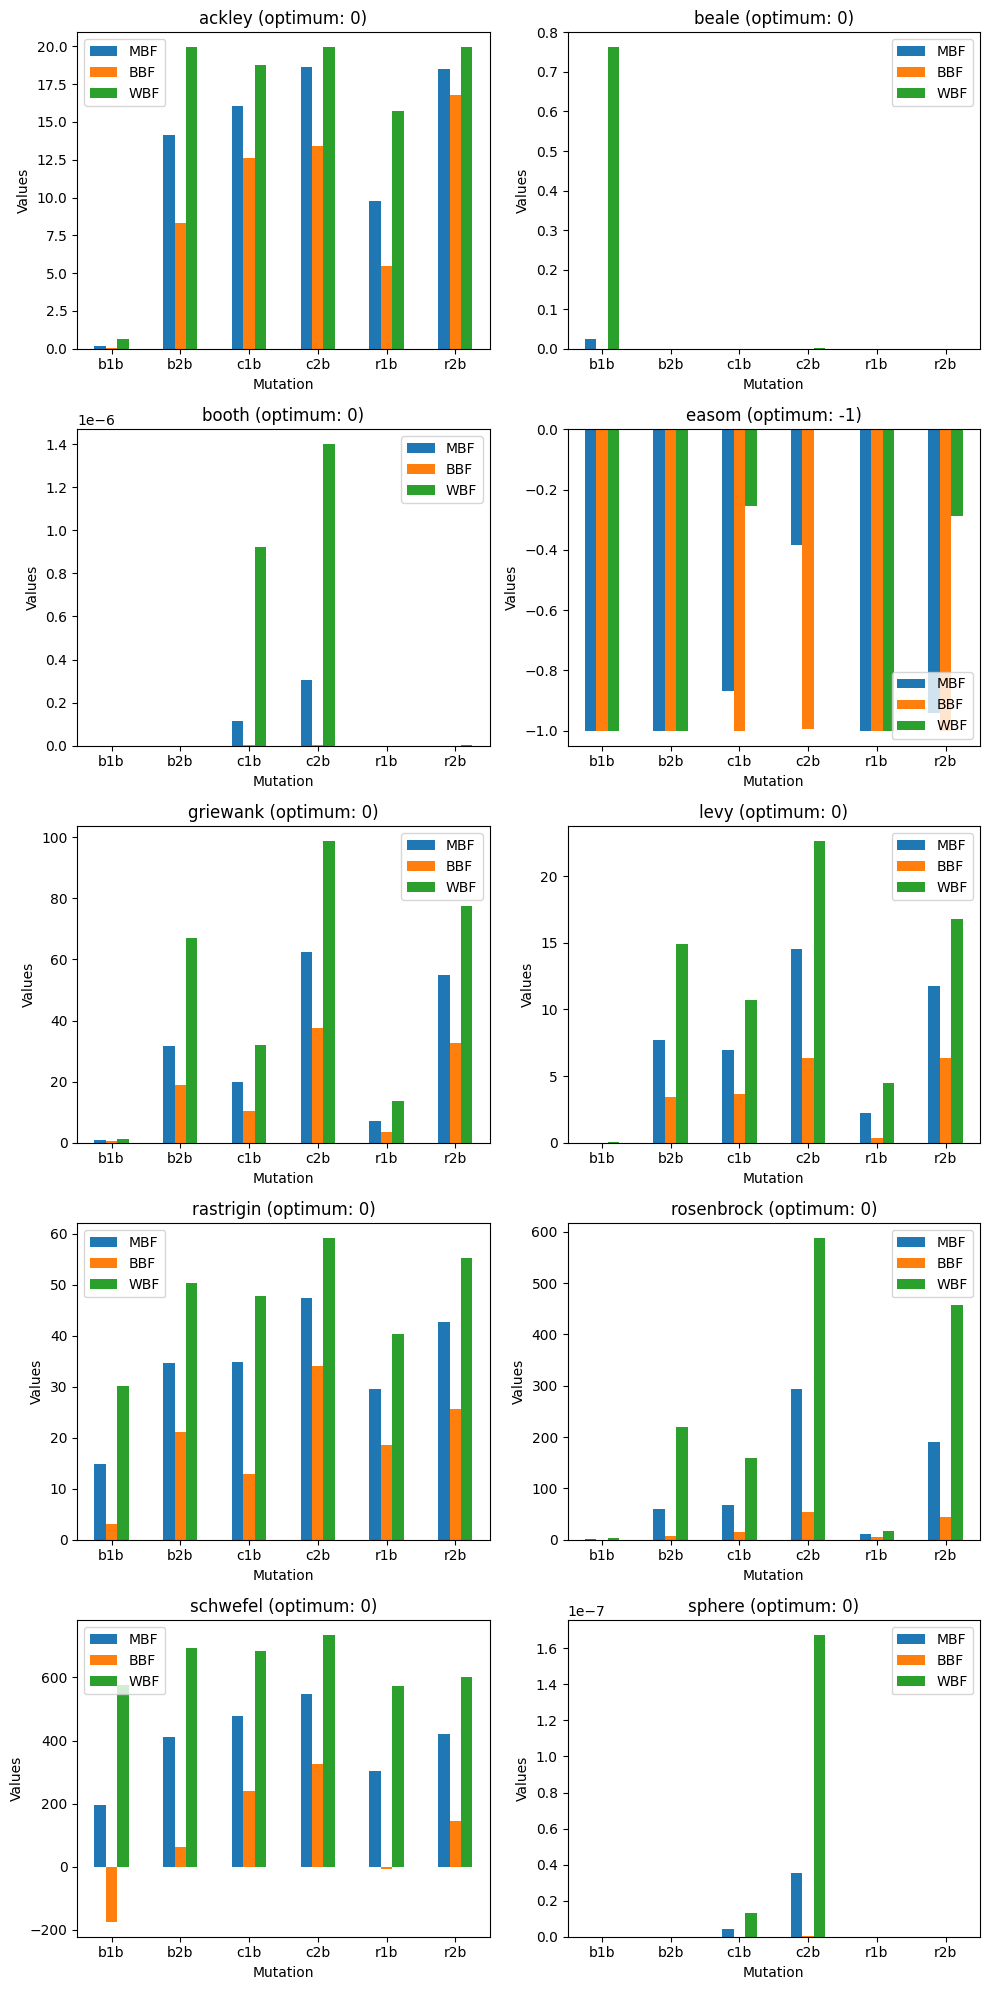

In [9]:
mutation_mapping = {
    'best1bin': 'b1b',
    'best2bin': 'b2b',
    'current1bin': 'c1b',
    'current2bin': 'c2b',
    'rand1bin': 'r1b',
    'rand2bin': 'r2b'
}

functions = results_df['funkcja'].unique()

n_cols = 2
n_rows = math.ceil(len(functions) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
axes = axes.flatten()

for i, func in enumerate(functions):
    ax = axes[i]
    func_data = results_df[results_df['funkcja'] == func]
    optimum_value = func_data['optimum'].iloc[0]
    func_data.loc[:, 'mutacja'] = func_data['mutacja'].replace(mutation_mapping)


    func_data.plot(
        x='mutacja',
        y=['MBF', 'BBF', 'WBF'],
        kind='bar',
        ax=ax,
        title=f"{func} (optimum: {optimum_value})"
    )
    ax.set_ylabel('Values')
    ax.set_xlabel('Mutation')
    ax.tick_params(axis='x', rotation=0)

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4. 